In [8]:
import seaborn as sns
import pandas as pd

# Ladda iris från seaborn
df = sns.load_dataset("iris")

# Snabb koll
print(df.shape)
print(df.info())
df.head()


(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Statistik för numeriska variabler
df.describe()

# Kolla fördelningen av klasser (species)
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

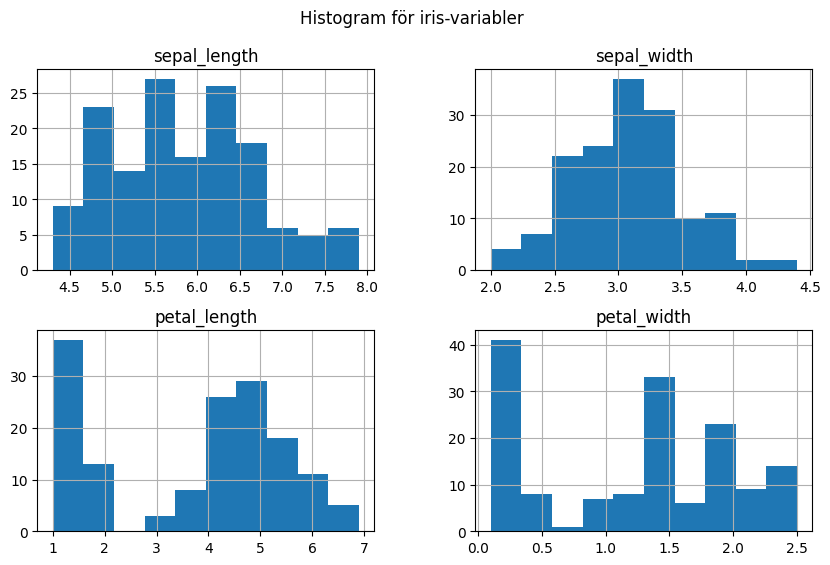

In [10]:
import matplotlib.pyplot as plt

# Histogram för varje numerisk kolumn
df.hist(figsize=(10, 6))
plt.suptitle("Histogram för iris-variabler")
plt.show()

In [13]:
# Dela upp i träning och test
from sklearn.model_selection import train_test_split

# Features (X) och target (y)
X = df.drop("species", axis=1)
y = df["species"]

# Dela upp i träning och test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Träning:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Träning: (120, 4) (120,)
Test: (30, 4) (30,)


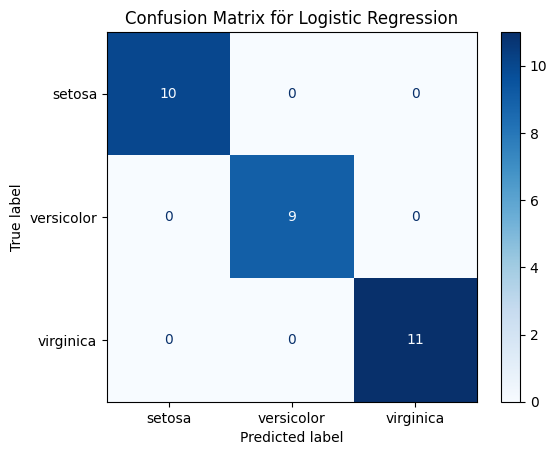

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Skapa och träna modellen
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Prediktera på testdatan
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix för Logistic Regression")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Bästa parametrar: {'C': 10, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'saga'}
Bästa CV-accuracy: 0.9666666666666668


c:\Users\hultb\Skola\AI_teori_och_tillampning_del_1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


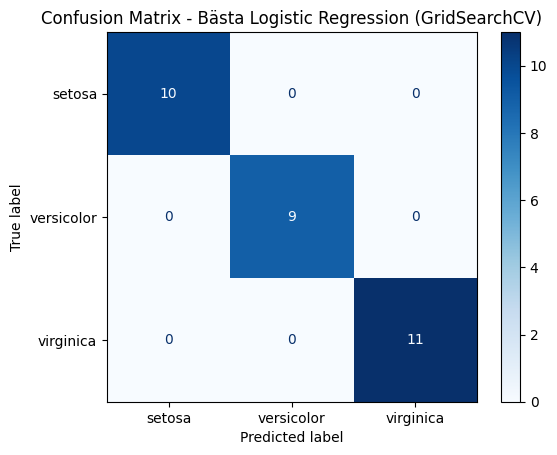

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definiera parametergriden
param_grid = {
    "penalty": ['l1', 'l2', "elasticnet", None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ["saga"],
    "l1_ratio": [0, 0.5, 1]  # Endast relevant för 'elasticnet'
}

# Skapa Logistic Regression och GridSearch
log_reg = LogisticRegression(max_iter=2000, random_state=42)
grid_search = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid, 
    cv=5, # 5-faldig korsvalidering
    scoring='accuracy', # optimera på accuracy
    n_jobs=-1, # parallellisering
)

# Träna GridSearch på träningsdatan
grid_search.fit(X_train, y_train)

# Bästa parametrar
print("Bästa parametrar:", grid_search.best_params_)
print("Bästa CV-accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Utvärdera testdatan
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Bästa Logistic Regression (GridSearchCV)")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))